In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/million-headlines/abcnews-date-text.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/kaggle/input/million-headlines/abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
df.columns

Index(['publish_date', 'headline_text'], dtype='object')

In [6]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB
None


In [7]:
# Show number of unique dates
print("Unique publish dates:", df['publish_date'].nunique())

Unique publish dates: 6882


In [8]:
# Visualize a word cloud of all headlines
text = " ".join(df['headline_text'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

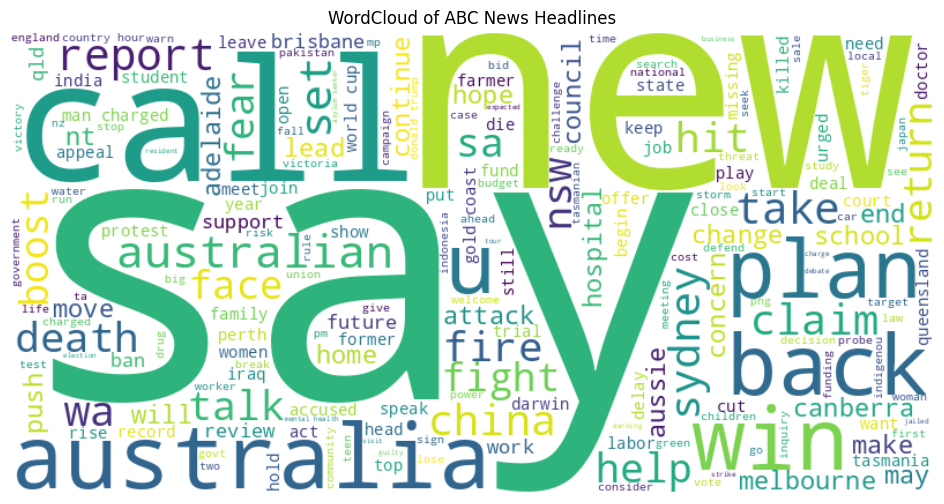

In [9]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of ABC News Headlines")
plt.show()

In [10]:
# Create a fake label column (e.g., classify headline length > 50 chars)
df['label'] = df['headline_text'].apply(lambda x: 1 if len(x) > 50 else 0)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and labels
X = df['headline_text']
y = df['label']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Model training
model = PassiveAggressiveClassifier()
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier()

In [15]:
# Prediction
y_pred = model.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    203959
           1       0.90      0.76      0.83     44878

    accuracy                           0.94    248837
   macro avg       0.92      0.87      0.90    248837
weighted avg       0.94      0.94      0.94    248837

